In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
iris=pd.read_csv('/content/Iris.csv')
iris.head()

In [ ]:
iris['Species'].unique()



In [ ]:
iris.describe(include='all')

In [ ]:
iris.info()

In [ ]:
iris.drop(columns="Id",inplace=True)

In [ ]:
iris.isnull().sum()

Train and Test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import make_scorer, accuracy_score,precision_score
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)


Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


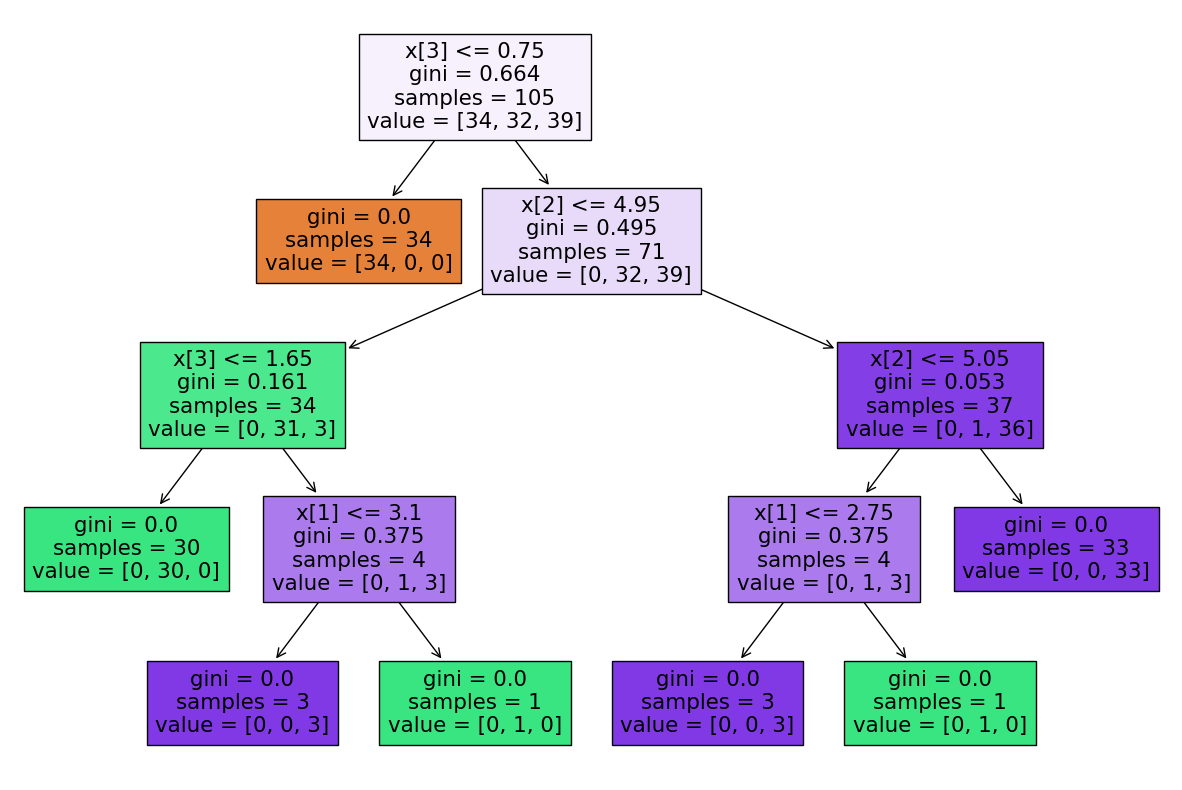

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

Nearist Neighobr

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_KNN : 0.978
precision_KNN : 0.978
recall_KNN: 0.978
f1-score_KNN : 0.978


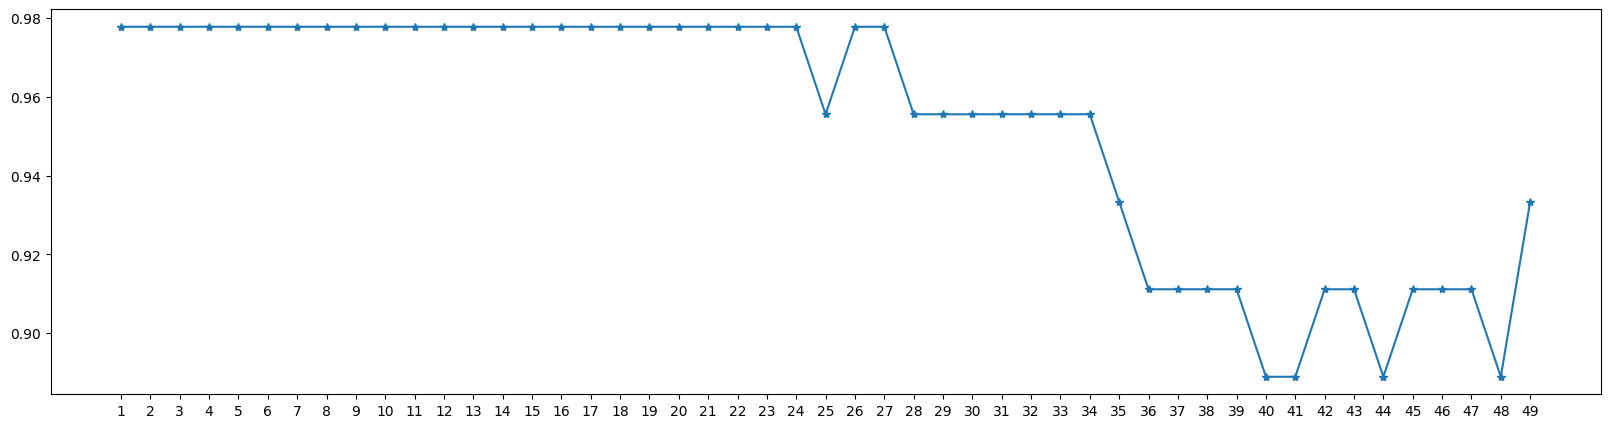

In [ ]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
# Initialize the a series
a = pd.Series()

# Use the correct method to append the new series
for i in list(range(1, 50)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    a = pd.concat([a, pd.Series(accuracy_score(y_test, prediction))])

# Plot the data
plt.plot(a_index, a, marker="*")
plt.xticks(x)
plt.show()